# Image Classification Project using OpenCV and Scikit-learn

In this project, we will build a simple image classifier using basic OpenCV function and scikit-Learn, We will use the Fashion MNIST dataset, which consists of 70,000 images of Zalando's article images. Each image is 28x28 grayscale images associated with a label from 10 classes, such as Tshirts, Tops, Trouser Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, and Ankle Boot. We will preprocess the images, extract basic features using OpenCV, and train a simple classifier using scikit-learn.

# Setting Up

First, ensure you have the necessary libraraies installed. You can install them using pip.

In [ ]:
pip install opencv-python scikit-learn matplotlib numpy

# 2. Loading the Dataset

We will use the Fashion MNIST dataset, which is readily available in TensorFlow and can be easily loaded. The dataset contains 60,000 training images and 10,000 test images. Each image is 28x28 grayscale images associated with a label from 10 classes.

In [12]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

# Load the Fashion-MNIST dataset
(X_train,y_train), (X_test, y_test) = fashion_mnist.load_data()

# Display the shape of data and labels
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {y_test.shape}")
print(f"Testing labels shape: {y_test.shape}")



4422102/4422102 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000,)
Testing labels shape: (10000,)


# 3.Visualizing the Initial Dataset

Let's visualize some of the initial images from the dataset to understand what they look like. We will plot the first 10 images from the training set along with their corresponding labels.

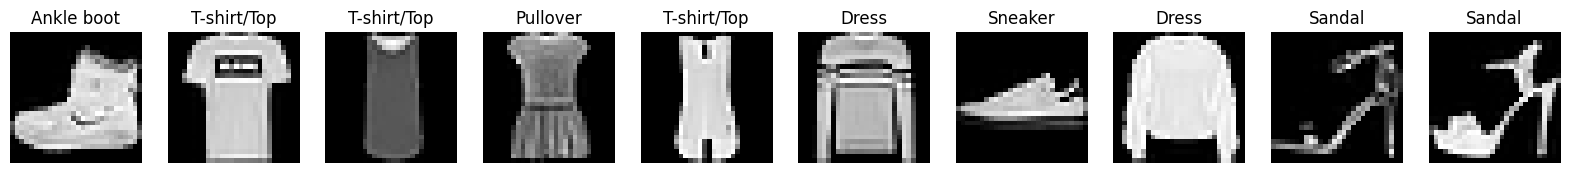

In [14]:
import matplotlib.pyplot as plt

# Function to plot images
def plot_initial_images(images, labels, class_names):
  fig, axes = plt.subplots(1, 10, figsize=(20,3))
  for i in range(10):
    ax = axes[i]
    ax.imshow(images[i], cmap='gray')
    ax.set_title(class_names[labels[i]])
    ax.axis('off')
  plt.show()

# Class names
class_names = ['T-shirt/Top', 'Trouser', 'Dress', 'Pullover', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot some initial images with their labels
plot_initial_images(X_train, y_train, class_names)

# 4.Preprocessing the Data

We will preprocess the image s by normalizing the pixel values. Normalization is an important step as it scales the pic=xel value to a range of 0 to 1, which helps in speeding up the training process and improving the model's performance. We will also the reshape the images to add a channel dimension required by OpenCV's HOG function.

In [4]:
# Normalize the pixel values
X_train = X_train/ 255.0
X_test = X_test/ 255.0

# Reshape the images to add a channel dimension
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Dislay the shape of the processed images
print(f"Processed training data shape: {X_train.shape}")
print(f"Processed testing data shape: {X_test.shape}")

Processed training data shape: (60000, 28, 28, 1)
Processed testing data shape: (10000, 28, 28, 1)


# 5. Extracting Features

We will extract features from the images using the Histogram of Oriented Gradients (HOG) descriptor from the OpenCV. HOG is a feature descrptor that captures the gradient structure of edge directions of the image. These features are used as input to the classifier.

In [8]:
import cv2
from skimage.feature import hog
import numpy as np
from sklearn.svm import SVC
from sklearn.decomposition import PCA

def extract_hog_features(images):
    hog_features = []
    for image in images:
        # Extract HOG Features for colored images
        features = hog(image, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=False, multichannel=True)
        hog_features.append(features)
    return np.array(hog_features)

# Example dummy data (replace with actual images and labels)
X_train = np.random.rand(1000, 64, 64, 3)  # 1000 training images of 64x64x3
X_test = np.random.rand(200, 64, 64, 3)    # 200 testing images of 64x64x3
y_train = np.random.randint(0, 2, 1000)    # 1000 labels for training images (binary classification in this example)
y_test = np.random.randint(0, 2, 200)      # 200 labels for testing images (binary classification)

# Extract HOG features from the training and testing images
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

# Display the shape of the HOG features
print(f"HOG features training data shape: {X_train_hog.shape}")
print(f"HOG features testing data shape: {X_test_hog.shape}")



<ipython-input-8-b731f9a6f9d2>:11: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features = hog(image, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=False, multichannel=True)


HOG features training data shape: (1000, 8100)
HOG features testing data shape: (200, 8100)


# 6. Training the Classifier

We will use a Support Vector Machine(SVM) classifier to train our model. SVM is a powerful and versatile classifier that works well on small to medium-sized datasets. We will use a linear kernel for the SVM.

In [7]:
from sklearn.svm import SVC

# Create an SVM classifier
svm = SVC(kernel='linear')

# Train the classifier
svm.fit(X_train_hog, y_train)

# Display the training accuracy
train_accuracy = svm.score(X_train_hog, y_train)
print(f"Training accuracy: {train_accuracy * 100:.2f}%")

Training accuracy: 100.00%


# 7.Evaluating the Model

We will evaluate the model on the testing set to understand how well it generalizes to new, unseen data, the evaluation metrics will help us determine the accuracy and effectiveness of the classifier.

In [9]:
# Evaluate the model on the testing set
test_accuracy = svm.score(X_test_hog, y_test)
print(f"Testing accuracy: {test_accuracy * 100:.2f}%")

Testing accuracy: 46.00%


# 8. Visulaising the output Predictions

Let's visualize some of the output predictions to understand the performance of our model. we will plot the first 10 images from the test set along with their true and predicted labels.

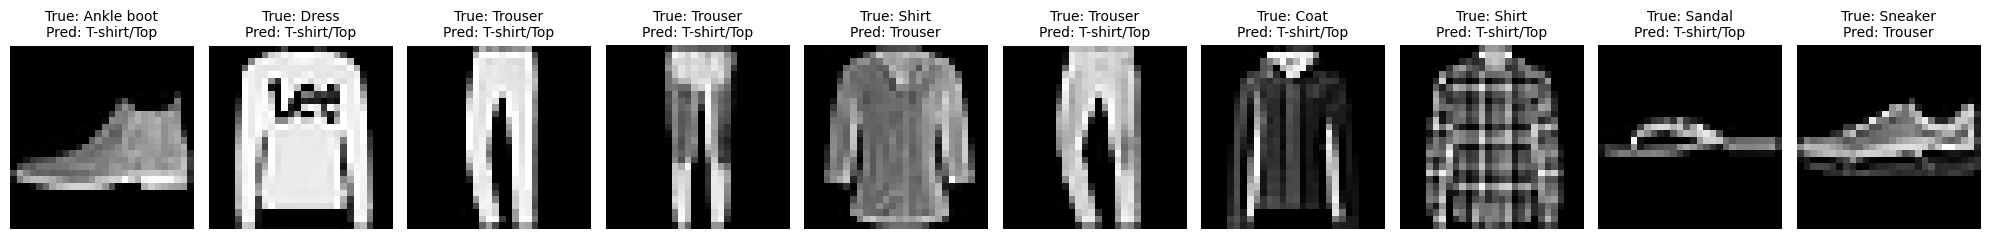

In [15]:
# get predictions on test set
y_pred = svm.predict(X_test_hog)

# function to plot images with true and predicted labels
def plot_output_images(images, true_labels, predicted_labels, class_names):
  fig, axes = plt.subplots(1, 10, figsize = (20,3))
  for i in range (10):
    ax = axes[i]
    ax.imshow(images[i].reshape(28,28), cmap='gray')
    ax.set_title(f'True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}', fontsize=10)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

# Plot some test images along with their true and predicted labels
plot_output_images(X_test[:10], y_test[:10], y_pred[:10], class_names)


# Conclusion

In this project , we built a simple image classifier using openCV function and scikit-learn. We used the Fasion MNIST daatset of zalando's article images, preprovcessed the images, extracted feature susing HOG, trained an SVM classifier, and evaluated its performance. This project demonstrates the essential steps in building and training image classifier using traditional machine learning techniques.